In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
import netCDF4
from kolzur_filter import kz_filter, kzft, kzp, _kz_coeffs

In [2]:
filelist = ['Eastern', 'Tap Mun', 'Tsuen Wan', 'Tung Chung', 'Yuen Long', 'Kwai Chung', 'Kwun Tong', 'Macau', 'Sha Tin', 'ShamShuiPo']

In [3]:
variablelist = ['Pressure', 'RH', 'Temperature', 'Wind']

In [4]:
time1 = '20360101-20451231'
time2 = '20460101-20551231'
time3 = '20860101-20951231'
time4 = '20960101-21001231'
timelist = [time1, time2, time3, time4]

In [5]:
# latitude = 100 # Latitude range from -90 to 90: len(lat) = 160
# longitude = 102 # Longitude range from 0 to 360: len(lon) = 320
# Eastern: 22.3036, 114.1719
# Tap Mun: 22.3036, 114.1719
# Tsuen Wan: 22.3594, 114.2153 ###
# Tung Chung: 22.2911, 113.9069
# Yuen Long: 22.4706, 113.9811
# Kwai Chung: 22.3594, 114.2153 ###
# Kwun Tong: 22.3147, 114.2233 ###
# Macau: 22.1600, 113.5650
# Sha Tin: 22.3036, 114.1719
# Sham Shui Po: 22.3315, 114.1567
location = [[99,101],[99,101],[99,102],[99,101],[99,101],[99,102],[99,102],[99,101],[99,101],[99,101]]

In [6]:
# Set the directory
directory = "Future Data/"
if not os.path.exists(directory):
    os.makedirs(directory)

In [11]:
def future(station, variable, time):
    Title = station
    path = 'Future ' + variable + '/' + variable + '_' + time + '.nc'
    nc = netCDF4.Dataset(path, mode='r')
    nc.variables.keys()
    
    lat = nc.variables['lat'][:]
    lon = nc.variables['lon'][:]
    time_var = nc.variables['time']
    dtime = netCDF4.num2date(time_var[:],time_var.units)
    if variable == 'Pressure':
        var = nc.variables['psl'][:]
        units = 'Pa'
    elif variable == 'RH':
        var = nc.variables['rhs'][:]
        units = '%'
    elif variable == 'Temperature':
        var = nc.variables['tas'][:] - 273
        units = 'Celcius'
    else:
        var = nc.variables['sfcWind'][:]
        units = 'm/s'
    # Eastern: 22.3036, 114.1719
    #latitude = 100 # Latitude range from -90 to 90: len(lat) = 160
    #longitude = 102 # Longitude range from 0 to 360: len(lon) = 320
    print('Latitude =', lat[latitude], '; Longitude =', lon[longitude])
    y = []
    for i in range(len(var)):
        y.append(var[i][latitude][longitude])
    x = dtime
    
    # Write csv files into 'Future Data/'
    matrix = pd.Series(y, index=x) 
    matrix.to_csv(directory + station + '_' + variable + '_' + time + '.csv', index=True, header=True)
    
    # KZ Filter and Graph
    m = 29
    k = 3
    y = np.array(y)
    y = kz_filter(y, m ,k)
    w = int(k * (m - 1) / 2)
    x = x[w:-w]
    plt.plot(x,y)
    plt.xlabel('Time')
    plt.ylabel(variable + ' (' + units + ')')
    plt.title(variable + " (" + station + ") " + time)
    plt.show()

Latitude = 21.86905 ; Longitude = 113.625


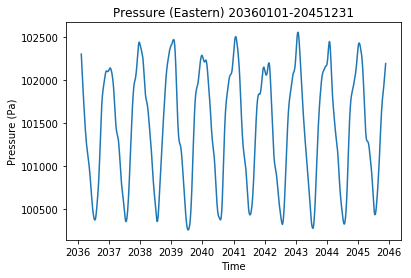

Latitude = 21.86905 ; Longitude = 113.625


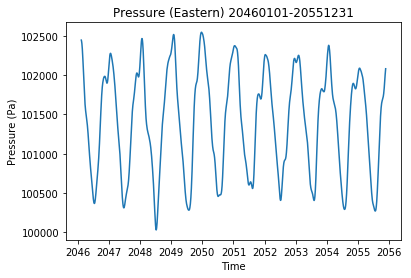

Latitude = 21.86905 ; Longitude = 113.625


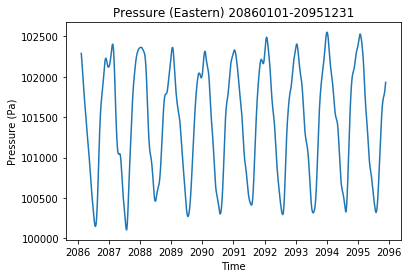

Latitude = 21.86905 ; Longitude = 113.625


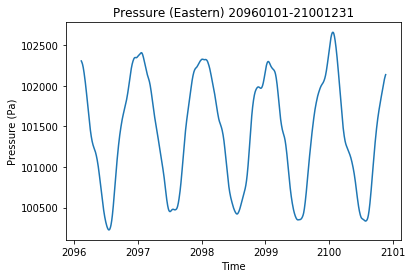

Latitude = 21.86905 ; Longitude = 113.625


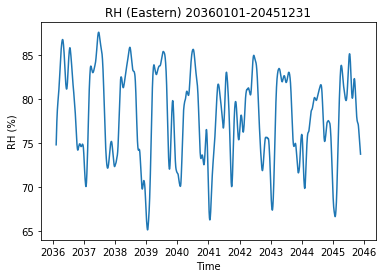

Latitude = 21.86905 ; Longitude = 113.625


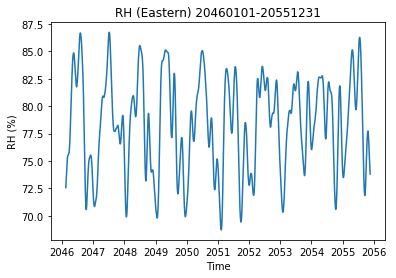

KeyboardInterrupt: 

In [12]:
for i in range(len(filelist)):
    for j in range(len(variablelist)):
        for k in range(len(timelist)):
            station = filelist[i]
            variable = variablelist[j]
            time = timelist[k]
            latitude = location[i][0]
            longitude = location[i][1]
            future(station, variable, time)